# The Road Back to Running Shape with the Apple Watch

I rarely ran for six years after completing a marathon. These days, running is a fun activity that helps me stay in shape. I got the Apple Watch some time in 2018 to check out its health features. It took me a few months before I started to use these features regularly. The watch has made running more fun; it has been helping me get back into running shape. 

## Setup

In [1]:
import pathlib

In [2]:
import pandas as pd

In [3]:
home = pathlib.Path.home()

In [4]:
study_path = f"{home}/small-data/study/apple-watch-health-tracking/story-data"

In [5]:
runs = pd.read_csv(f"{study_path}/apple-watch-runs-summary-study.csv",parse_dates=['date'])

## Runs Spanning 23 Months

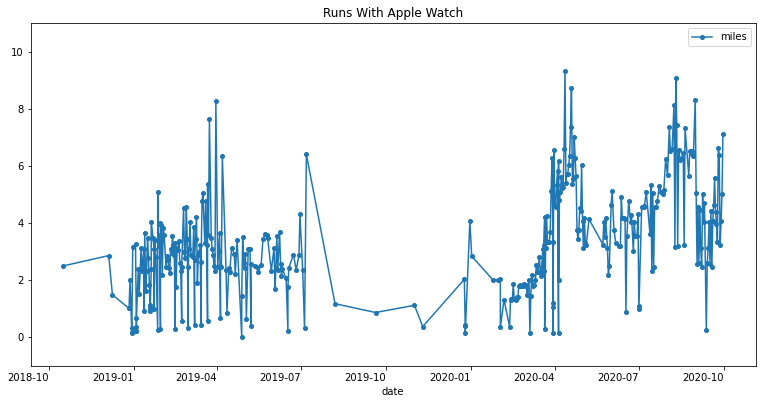

In [6]:
runs_lp = runs.plot.line(
    title="Runs With Apple Watch",
    y=["miles"],
    x="date",
    figsize=(13, 7),
    markevery=1, markersize=8, style='.-',
    rot=0, 
    ylim=[-1, 11])

In [7]:
runs_lp.get_figure().savefig(f"{study_path}/running_shape_total_runs")

## Annual Run Miles

In [8]:
runstats = runs.groupby(by=runs['year']).sum()

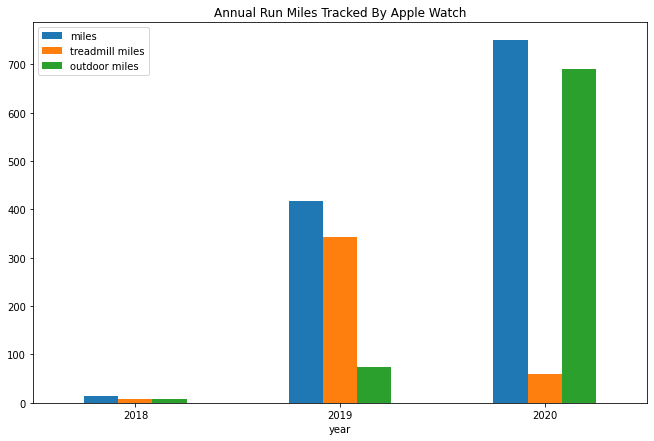

In [9]:
runstats_bp = runstats.plot.bar(y=['miles', 'treadmill miles', 'outdoor miles'], 
                                title='Annual Run Miles Tracked By Apple Watch', 
                                figsize=(11, 7), rot=0)

In [10]:
runstats_bp.get_figure().savefig(f"{study_path}/annual_run_miles")

### Annual Minimum 5K Runs

In [11]:
runs_5k_min = runs.loc[runs['miles'] >= 3.10]

In [12]:
runs_5k_min_by_year = runs_5k_min.groupby('year').count()

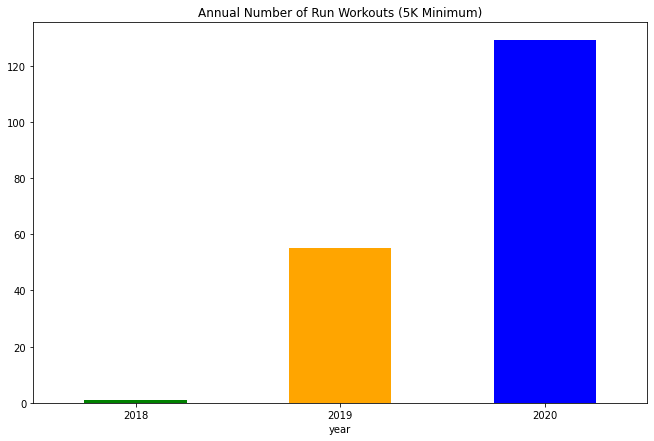

In [13]:
runstats_5k_min_bp = runs_5k_min_by_year.plot.bar(
    y='miles', legend=False, 
    title='Annual Number of Run Workouts (5K Minimum)',
    color=["green", "orange", "blue"],
    figsize=(11, 7), rot=0)

In [14]:
runstats_5k_min_bp.get_figure().savefig(f"{study_path}/annual_runs_5k_min")

## Annual Minimum 10K Runs

In [15]:
runs_10k_min = runs.loc[runs['miles'] >= 6.20]

In [16]:
runs_10k_min_by_year = runs_10k_min.groupby('year').count()

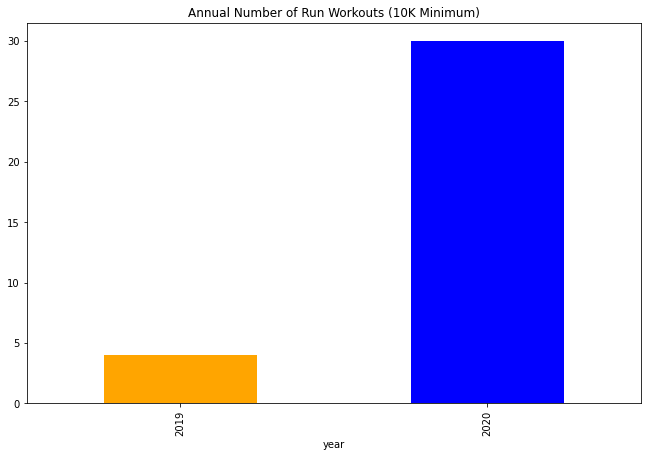

In [17]:
runstats_10k_min_bp = runs_10k_min_by_year.plot.bar(
    y='miles', color=['orange', 'blue'], 
    legend=False, 
    title='Annual Number of Run Workouts (10K Minimum)', 
    figsize=(11, 7))

In [18]:
runstats_10k_min_bp.get_figure().savefig(f"{study_path}/annual_runs_10k_min")

## 2020 Regular Outdoor Runs

In [19]:
regular_outdoor_runs = pd.read_csv(f"{study_path}/running-shape-stats.csv")

### Miles per Month

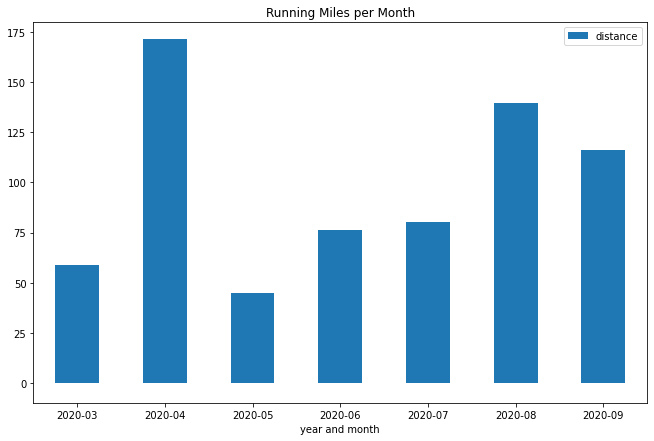

In [20]:
outdoor_runs_miles_bp = regular_outdoor_runs.plot.bar(
    title="Running Miles per Month",
    x="year and month", 
    y=["distance"], 
    ylim=[-10, 180],
    figsize=(11, 7), rot=0,
)

Notes:

1. Too much too soon, 41 straight days of running from March 26 to May 5.
2. Two weeks of running break in May.


In [21]:
outdoor_runs_miles_bp.get_figure().savefig(f"{study_path}/outdoor_monthly_miles_2020")

### March Running Pace as Baseline

In [22]:
translated_pace = pd.read_csv(f"{study_path}/fitness-average-pace-translated.csv")

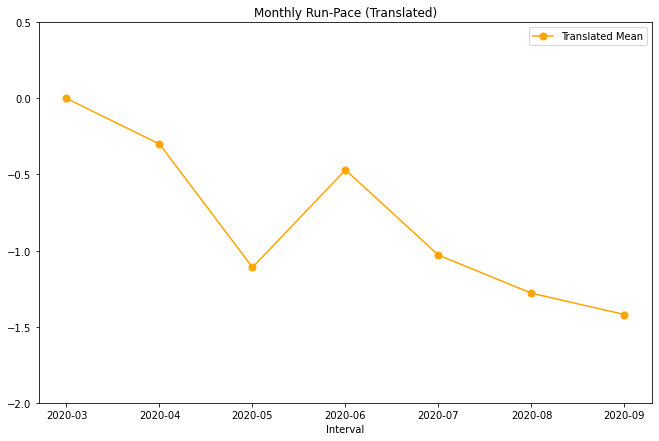

In [23]:
outdoor_runs_pace_bp = translated_pace.plot.line(
    title="Monthly Run-Pace (Translated)",
    x="Interval", 
    y=["Translated Mean"], 
    ylim=[-2, 0.5],
    figsize=(11, 7), rot=0,
    color="orange",
    markevery=1, markersize=14, style='.-',
)

Every month after March shows a faster running pace than March's running pace. The graph makes it appear like I regressed after May, but May has the lowest running mileae. I took a two-week break from running in May after completing 41-straight days of running. In addition, with shorter run workouts in May, I pushed myself to run as fast as I could in May.


In [24]:
outdoor_runs_pace_bp.get_figure().savefig(f"{study_path}/outdoor_monthly_pacechange_2020")